<a href="https://colab.research.google.com/github/Fortirer/Bioinformatic_Python_Intro/blob/main/DataPreprocessingFer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analise para o artigo Soja Efeito Triplo

Contextualização:
A base de dados contém dados sobre experimento que simularam as alterções climáticas, com elevado CO2 controle (400ppm) e elevado (800ppm), temperatura ambiente e temperatura (+5°C), bem regado e com estresse hídrico (regado a cada 3 dias com 100ml).

- Parte I: análise exploratória dos dados.

- Parte II: análise de correlações.

- Parte III: Modelo multivariado

Obs. todos os dados X são referentes a coleta de dados de 60 dias de experimento
Já a variavel resposta grão Y é referente ao fim do experimento de 125 dias.

Objetivo do trabalho:
Analisar o efeito das mudanças climáticas na produção de soja.
Em 6 condições (Controle = Amb, Elev, Temp, ElevTemp, Drought, ElevDrought)

Os dados são referentes a 2 experimentos independentes
Com N amostral N = 10

Experimento #1
Amb
Elev
Temp
ElevTemp

Experimento #2
Amb
Elev
Drought
ElevDrought


Como tem a repetição das condições Amb e Elev nos dois experimentos
resultando em um N = 20 para essas condições.
Fiz um merge de 5 amostras (random) de cada tratamento Amb e *Elev*

Esta análise foi realizada utilizando os materiais base:
https://github.com/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/Pré_Processamento_de_dados.ipynb

https://github.com/cibelerusso/AnaliseMultivariadaEAprendizadoNaoSupervisionado/blob/master/Comandos%20em%20Python/9%20An%C3%A1lisedeCorrela%C3%A7%C3%A3oCanonica.ipynb


Parte I: análise exploratória

para verificar a distribuição dos dados, relações e possíveis padrões. visualizar como as variáveis estão relacionadas.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.dpi'] = 140

In [ ]:
df = pd.read_csv("/content/correlacao_acai.csv", sep = ";")
df.head()

Tratament  A_L1  Gs_L1  Heigh_L1  Heigh_L2  Area_L1  Root_Lengh_   TCR  \
0       Amb   NaN    NaN       NaN       NaN      NaN        26.48   NaN   
1       Amb  3.87  0.017     29.06       NaN    62.59        29.24  0.01   
2       Amb  4.87  0.058     32.50     10.05    63.16        34.74  0.02   
3       Amb  5.10  0.070     32.90     16.20    64.64        32.13  0.01   
4       Amb  5.32  0.060     33.04     31.18    62.80        37.40  0.02   

   Biom_Tot  Biom_L  ...      Suc_E     Raf_E     Myo_E    Sta_E     Glu_R  \
0   0.79282    0.19  ...   6.042756  0.081698  2.173511  21.5360  1.765039   
1   0.92072    0.25  ...   7.557117  0.070040  2.084191  14.8672  1.616287   
2   1.15012    0.34  ...   7.813670  0.061259  1.837346  21.6704  1.630370   
3   1.35788    0.44  ...  12.729350  0.140253  2.154201  36.9920  1.985734   
4   1.69540    0.51  ...  14.397656  0.300039  2.147192  25.8176  1.810520   

      Fru_R      Suc_R     Raf_R     Myo_R   Sta_R  
0  1.452895  10.157310  0.118129  0.439084  2.3680  
1  1.474662   8.145404  0.150074  0.385720  1.4944  
2  1.851200   6.974582  0.064616  0.230876  1.2672  
3  2.111216   5.858522  0.044066  0.203541  0.9728  
4  1.724817   9.482978  0.058968  0.227166  1.4880  

[5 rows x 30 columns]

In [ ]:
df.shape

(36, 30)

In [ ]:
df.describe()

A_L1      Gs_L1   Heigh_L1   Heigh_L2    Area_L1  Root_Lengh_  \
count  10.000000  10.000000  10.000000   8.000000  12.000000    14.000000   
mean    5.300000   0.039000  31.773000  24.288750  62.184167    34.020714   
std     1.132117   0.019253   1.505538  11.676673   2.736220     5.002317   
min     3.870000   0.013000  29.060000  10.050000  58.740000    26.480000   
25%     4.737500   0.023000  31.687500  14.852500  59.925000    29.740000   
50%     4.985000   0.040000  32.235000  24.605000  62.695000    34.770000   
75%     6.055000   0.053500  32.800000  34.795000  63.280000    38.075000   
max     7.360000   0.070000  33.090000  37.060000  68.300000    41.900000   

             TCR   Biom_Tot     Biom_L     Biom_E  ...      Suc_E      Raf_E  \
count  12.000000  14.000000  14.000000  14.000000  ...  14.000000  14.000000   
mean    0.018333   1.624198   0.430714   0.527857  ...  10.090843   0.134853   
std     0.015859   0.704028   0.156867   0.284177  ...   2.930773   0.076821   
min    -0.010000   0.792820   0.190000   0.230000  ...   6.042756   0.052703   
25%     0.010000   1.043680   0.302500   0.312500  ...   7.949479   0.081043   
50%     0.015000   1.488735   0.465000   0.415000  ...   9.449220   0.127327   
75%     0.022500   2.080268   0.510000   0.720000  ...  12.425091   0.145586   
max     0.050000   2.938133   0.670000   1.070000  ...  14.852732   0.300039   

           Myo_E      Sta_E      Glu_R      Fru_R      Suc_R      Raf_R  \
count  14.000000  14.000000  14.000000  14.000000  14.000000  14.000000   
mean    1.932936  29.693600   2.079895   1.934935   8.273702   0.072029   
std     0.286633   9.082228   0.472661   0.557272   1.607978   0.048916   
min     1.345755  14.867200   1.495013   1.355820   5.839713   0.025335   
25%     1.825750  22.147200   1.765039   1.501976   7.016433   0.034207   
50%     1.949114  27.830400   1.906078   1.771229   8.211865   0.056597   
75%     2.152449  37.616000   2.334417   2.192153   9.899845   0.105696   
max     2.385452  45.216000   3.027324   3.150462  10.465246   0.176232   

           Myo_R      Sta_R  
count  14.000000  14.000000  
mean    0.277275   1.905829  
std     0.090056   0.689207  
min     0.196393   0.832000  
25%     0.202811   1.322400  
50%     0.244646   2.110400  
75%     0.337897   2.368000  
max     0.439084   2.979200  

[8 rows x 29 columns]

In [ ]:
df.groupby('Tratament').describe().transpose()

Tratament         Amb      Elev
A_L1  count  5.000000  5.000000
      mean   4.632000  5.968000
      std    0.657472  1.155842
      min    3.870000  4.700000
      25%    4.000000  4.850000
...               ...       ...
Sta_R min    0.972800  0.832000
      25%    1.377600  1.580800
      50%    1.494400  2.243200
      75%    2.558400  2.321600
      max    2.979200  2.483200

[232 rows x 2 columns]


Codificação de variável categórica para numérica


In [ ]:
df.head()

Tratament  A_L1  Gs_L1  Heigh_L1  Heigh_L2  Area_L1  Root_Lengh_   TCR  \
0       Amb   NaN    NaN       NaN       NaN      NaN        26.48   NaN   
1       Amb  3.87  0.017     29.06       NaN    62.59        29.24  0.01   
2       Amb  4.87  0.058     32.50     10.05    63.16        34.74  0.02   
3       Amb  5.10  0.070     32.90     16.20    64.64        32.13  0.01   
4       Amb  5.32  0.060     33.04     31.18    62.80        37.40  0.02   

   Biom_Tot  Biom_L  ...      Suc_E     Raf_E     Myo_E    Sta_E     Glu_R  \
0   0.79282    0.19  ...   6.042756  0.081698  2.173511  21.5360  1.765039   
1   0.92072    0.25  ...   7.557117  0.070040  2.084191  14.8672  1.616287   
2   1.15012    0.34  ...   7.813670  0.061259  1.837346  21.6704  1.630370   
3   1.35788    0.44  ...  12.729350  0.140253  2.154201  36.9920  1.985734   
4   1.69540    0.51  ...  14.397656  0.300039  2.147192  25.8176  1.810520   

      Fru_R      Suc_R     Raf_R     Myo_R   Sta_R  
0  1.452895  10.157310  0.118129  0.439084  2.3680  
1  1.474662   8.145404  0.150074  0.385720  1.4944  
2  1.851200   6.974582  0.064616  0.230876  1.2672  
3  2.111216   5.858522  0.044066  0.203541  0.9728  
4  1.724817   9.482978  0.058968  0.227166  1.4880  

[5 rows x 30 columns]


Dados faltantes: Verificação e possibilidades para tratamento


In [ ]:
df.isna().sum()

Tratament      22
A_L1           26
Gs_L1          26
Heigh_L1       26
Heigh_L2       28
Area_L1        24
Root_Lengh_    22
TCR            24
Biom_Tot       22
Biom_L         22
Biom_E         22
Biom_R         22
Glu_L1         22
Fru_L1         22
Suc_L1         22
Raf_L1         22
Myo_L1         22
Sta_L1         22
Glu_E          22
Fru_E          22
Suc_E          22
Raf_E          22
Myo_E          22
Sta_E          22
Glu_R          22
Fru_R          22
Suc_R          22
Raf_R          22
Myo_R          22
Sta_R          22
dtype: int64

Padronização dos dados


Detecção de outliers
Visualização de dados: matriz de dispersão e densidades alisadas

In [ ]:
sns.pairplot(df,hue='Tratament', height=2)

In [ ]:
df.head(10)

Tratament  A_L1  Gs_L1  Heigh_L1  Heigh_L2  Area_L1  Root_Lengh_   TCR  \
0       Amb   NaN    NaN       NaN       NaN      NaN        26.48   NaN   
1       Amb  3.87  0.017     29.06       NaN    62.59        29.24  0.01   
2       Amb  4.87  0.058     32.50     10.05    63.16        34.74  0.02   
3       Amb  5.10  0.070     32.90     16.20    64.64        32.13  0.01   
4       Amb  5.32  0.060     33.04     31.18    62.80        37.40  0.02   
5       Amb   NaN    NaN       NaN       NaN    68.30        38.90  0.02   
6       Amb  4.00  0.040     33.09     36.88    63.64        38.20  0.01   
7      Elev   NaN    NaN       NaN       NaN      NaN        26.48   NaN   
8      Elev  4.85  0.013     29.06       NaN    58.74        29.62  0.01   
9      Elev  6.63  0.032     31.57     10.81    59.99        30.10  0.03   

   Biom_Tot  Biom_L  ...      Suc_E     Raf_E     Myo_E    Sta_E     Glu_R  \
0  0.792820    0.19  ...   6.042756  0.081698  2.173511  21.5360  1.765039   
1  0.920720    0.25  ...   7.557117  0.070040  2.084191  14.8672  1.616287   
2  1.150120    0.34  ...   7.813670  0.061259  1.837346  21.6704  1.630370   
3  1.357880    0.44  ...  12.729350  0.140253  2.154201  36.9920  1.985734   
4  1.695400    0.51  ...  14.397656  0.300039  2.147192  25.8176  1.810520   
5  1.999452    0.51  ...   8.356905  0.080824  1.576214  23.5776  1.826422   
6  2.107207    0.49  ...  13.040508  0.220991  2.385452  39.6736  3.027324   
7  0.792820    0.19  ...   6.042756  0.081698  2.173511  21.5360  1.765039   
8  1.008200    0.29  ...   9.113869  0.129787  1.892703  29.8432  1.495013   
9  1.428780    0.47  ...   8.545883  0.052703  1.570920  32.7744  2.267418   

      Fru_R      Suc_R     Raf_R     Myo_R   Sta_R  
0  1.452895  10.157310  0.118129  0.439084  2.3680  
1  1.474662   8.145404  0.150074  0.385720  1.4944  
2  1.851200   6.974582  0.064616  0.230876  1.2672  
3  2.111216   5.858522  0.044066  0.203541  0.9728  
4  1.724817   9.482978  0.058968  0.227166  1.4880  
5  1.583918   6.889028  0.031359  0.201865  2.7488  
6  3.150462   7.718711  0.042750  0.266147  2.9792  
7  1.452895  10.157310  0.118129  0.439084  2.3680  
8  1.355820  10.038801  0.176232  0.360210  2.4832  
9  1.629055   8.683906  0.068398  0.196393  1.1840  

[10 rows x 30 columns]

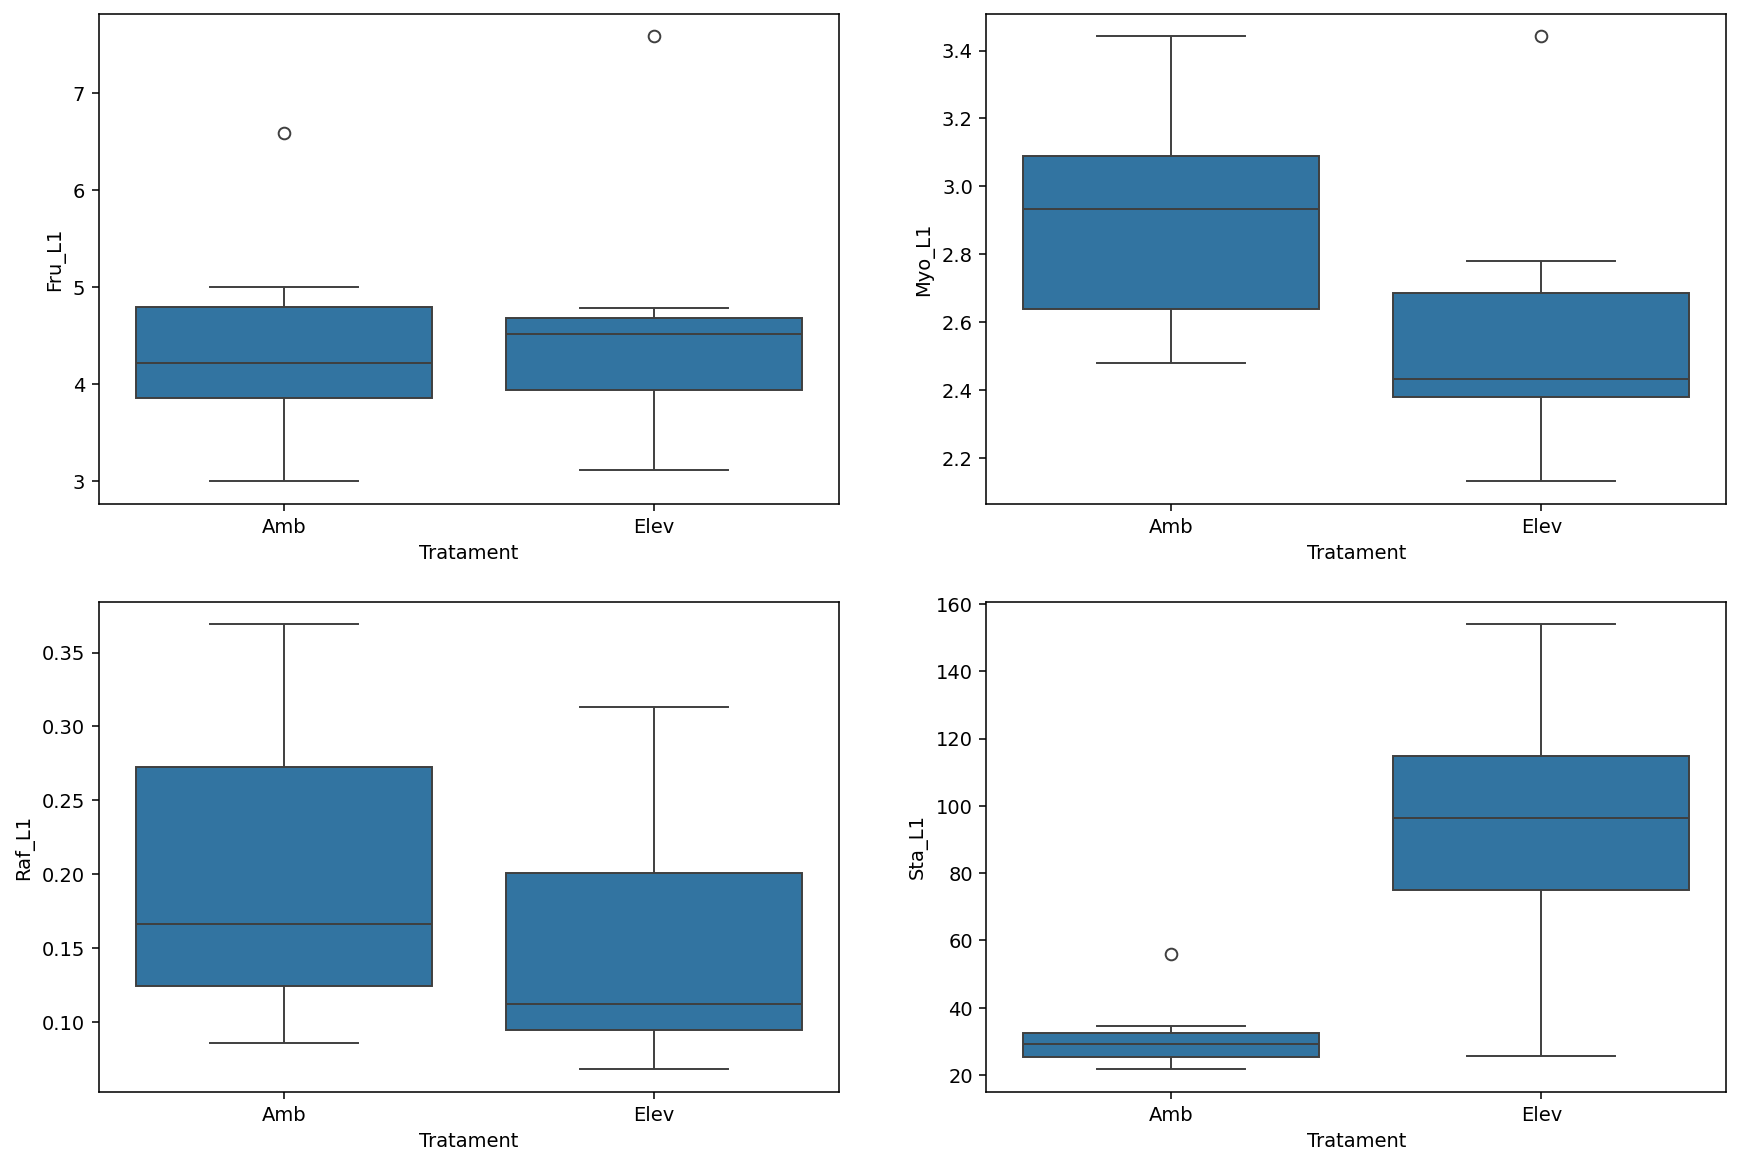

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

fig, axes = plt.subplots(2, 2)
sns.boxplot(data=df, y='Fru_L1', x='Tratament', ax=axes[0,0])
sns.boxplot(data=df, y='Raf_L1', x='Tratament', ax=axes[1,0])
sns.boxplot(data=df, y='Myo_L1', x='Tratament', ax=axes[0,1])
sns.boxplot(data=df, y='Sta_L1', x='Tratament', ax=axes[1,1])
plt.show()

Parte II Análise de correlação

verificar correlações entre as variáveis para identificar possíveis relações entre as variaveis


In [ ]:
plt.rcParams["figure.figsize"] = (12,12)

In [ ]:
df.head()

Tratament  A_L1  Gs_L1  Heigh_L1  Heigh_L2  Area_L1  Root_Lengh_   TCR  \
0       Amb   NaN    NaN       NaN       NaN      NaN        26.48   NaN   
1       Amb  3.87  0.017     29.06       NaN    62.59        29.24  0.01   
2       Amb  4.87  0.058     32.50     10.05    63.16        34.74  0.02   
3       Amb  5.10  0.070     32.90     16.20    64.64        32.13  0.01   
4       Amb  5.32  0.060     33.04     31.18    62.80        37.40  0.02   

   Biom_Tot  Biom_L  ...      Suc_E     Raf_E     Myo_E    Sta_E     Glu_R  \
0   0.79282    0.19  ...   6.042756  0.081698  2.173511  21.5360  1.765039   
1   0.92072    0.25  ...   7.557117  0.070040  2.084191  14.8672  1.616287   
2   1.15012    0.34  ...   7.813670  0.061259  1.837346  21.6704  1.630370   
3   1.35788    0.44  ...  12.729350  0.140253  2.154201  36.9920  1.985734   
4   1.69540    0.51  ...  14.397656  0.300039  2.147192  25.8176  1.810520   

      Fru_R      Suc_R     Raf_R     Myo_R   Sta_R  
0  1.452895  10.157310  0.118129  0.439084  2.3680  
1  1.474662   8.145404  0.150074  0.385720  1.4944  
2  1.851200   6.974582  0.064616  0.230876  1.2672  
3  2.111216   5.858522  0.044066  0.203541  0.9728  
4  1.724817   9.482978  0.058968  0.227166  1.4880  

[5 rows x 30 columns]

In [ ]:
df.shape

(36, 30)

In [ ]:
X = df.iloc[:,0:20]
Y = df.iloc[:,20]

In [ ]:
X.head()

Tratament  A_L1  Gs_L1  Heigh_L1  Heigh_L2  Area_L1  Root_Lengh_   TCR  \
0       Amb   NaN    NaN       NaN       NaN      NaN        26.48   NaN   
1       Amb  3.87  0.017     29.06       NaN    62.59        29.24  0.01   
2       Amb  4.87  0.058     32.50     10.05    63.16        34.74  0.02   
3       Amb  5.10  0.070     32.90     16.20    64.64        32.13  0.01   
4       Amb  5.32  0.060     33.04     31.18    62.80        37.40  0.02   

   Biom_Tot  Biom_L  Biom_E  Biom_R    Glu_L1    Fru_L1    Suc_L1    Raf_L1  \
0   0.79282    0.19    0.23    0.16  4.515026  4.582784  3.009414  0.192099   
1   0.92072    0.25    0.28    0.22  3.877175  4.221613  8.401614  0.369405   
2   1.15012    0.34    0.32    0.34  3.353345  3.000940  6.401590  0.137969   
3   1.35788    0.44    0.44    0.31  5.554664  5.004746  5.311578  0.085653   
4   1.69540    0.51    0.52    0.51  6.130289  6.588501  6.964652  0.352378   

     Myo_L1   Sta_L1      Glu_E     Fru_E  
0  3.443045  25.4784   6.696342  3.788623  
1  3.139806  21.6576   8.314589  3.057909  
2  2.479320  30.3232   9.031655  2.419232  
3  2.624704  25.2736  11.956340  8.101442  
4  3.041201  29.2224  11.098097  9.168658

In [ ]:
Y.head()

0     6.042756
1     7.557117
2     7.813670
3    12.729350
4    14.397656
Name: Suc_E, dtype: float64

In [ ]:
# removendo primeira coluna
df = df.drop(df.columns[0], axis=1)
df.head()

A_L1  Gs_L1  Heigh_L1  Heigh_L2  Area_L1  Root_Lengh_   TCR  Biom_Tot  \
0   NaN    NaN       NaN       NaN      NaN        26.48   NaN   0.79282   
1  3.87  0.017     29.06       NaN    62.59        29.24  0.01   0.92072   
2  4.87  0.058     32.50     10.05    63.16        34.74  0.02   1.15012   
3  5.10  0.070     32.90     16.20    64.64        32.13  0.01   1.35788   
4  5.32  0.060     33.04     31.18    62.80        37.40  0.02   1.69540   

   Biom_L  Biom_E  ...      Suc_E     Raf_E     Myo_E    Sta_E     Glu_R  \
0    0.19    0.23  ...   6.042756  0.081698  2.173511  21.5360  1.765039   
1    0.25    0.28  ...   7.557117  0.070040  2.084191  14.8672  1.616287   
2    0.34    0.32  ...   7.813670  0.061259  1.837346  21.6704  1.630370   
3    0.44    0.44  ...  12.729350  0.140253  2.154201  36.9920  1.985734   
4    0.51    0.52  ...  14.397656  0.300039  2.147192  25.8176  1.810520   

      Fru_R      Suc_R     Raf_R     Myo_R   Sta_R  
0  1.452895  10.157310  0.118129  0.439084  2.3680  
1  1.474662   8.145404  0.150074  0.385720  1.4944  
2  1.851200   6.974582  0.064616  0.230876  1.2672  
3  2.111216   5.858522  0.044066  0.203541  0.9728  
4  1.724817   9.482978  0.058968  0.227166  1.4880  

[5 rows x 29 columns]

In [ ]:
X.shape

(36, 20)

In [ ]:
Y.shape

(36,)

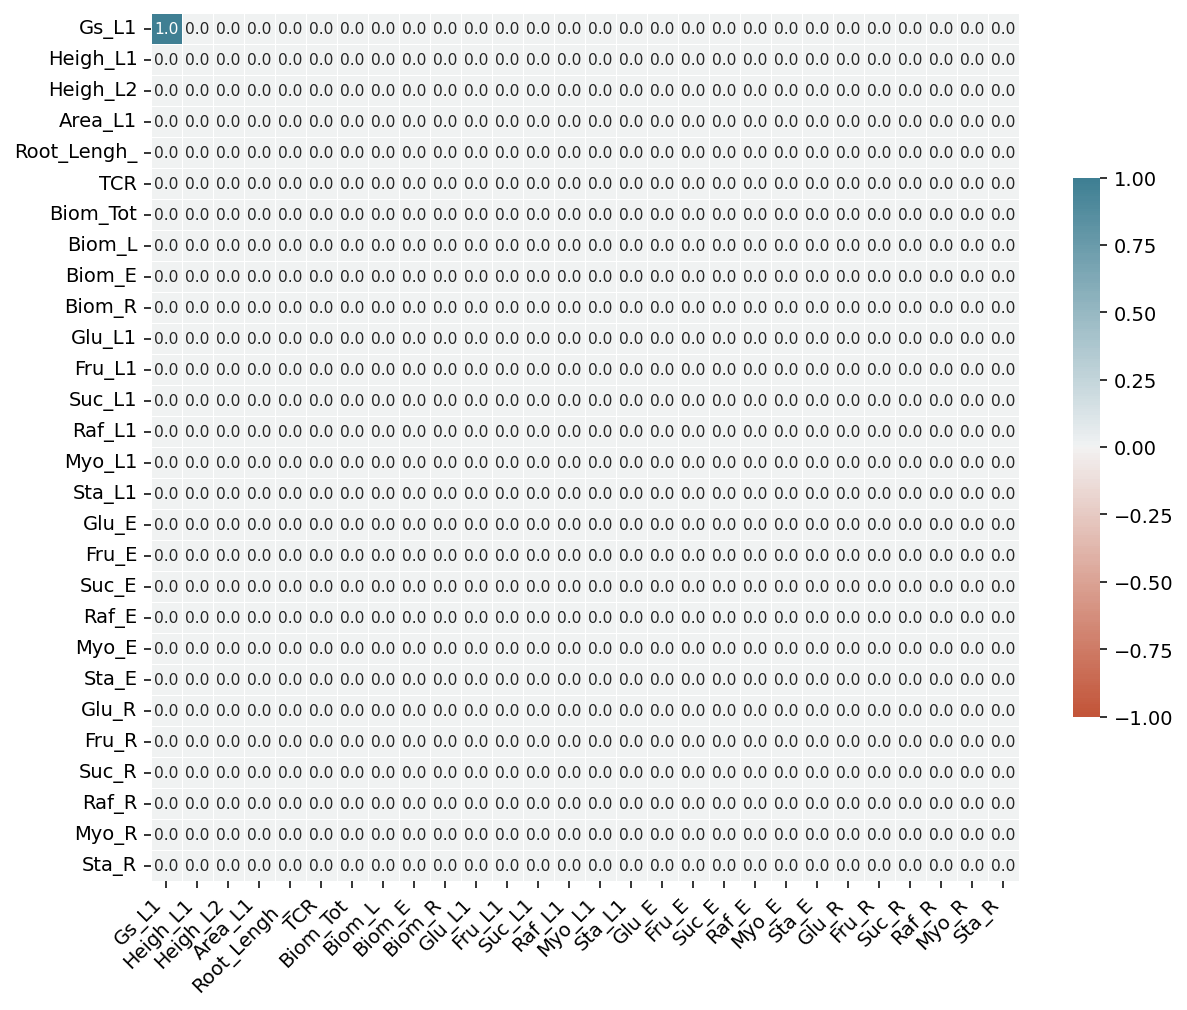

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure a figura
plt.figure(figsize=(10, 10))

# Crie o heatmap
sns.heatmap(
    corr,
    annot=True,  # adicionar números no heatmap
    fmt=".1f",   # 1 casa decimal
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},  # otimização dos parâmetros de ajuste do tamanho da barra de cor
    annot_kws={"size": 8}  # diminuir o tamanho da fonte das anotações
)

# Rotação do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Mostrar a figura
plt.show()


In [ ]:
# fazendo só para ambiente
df = pd.read_csv("/content/Corr_acai_amb.csv", sep = ";")
df.head()


A_L1  Gs_L1  Heigh_L1  Heigh_L2  Area_L1  Root_Lengh_   TCR  Biom_Tot  \
0   NaN    NaN       NaN       NaN      NaN        26.48   NaN   0.79282   
1  3.87  0.017     29.06       NaN    62.59        29.24  0.01   0.92072   
2  4.87  0.058     32.50     10.05    63.16        34.74  0.02   1.15012   
3  5.10  0.070     32.90     16.20    64.64        32.13  0.01   1.35788   
4  5.32  0.060     33.04     31.18    62.80        37.40  0.02   1.69540   

   Biom_L  Biom_E  ...      Suc_E     Raf_E     Myo_E    Sta_E     Glu_R  \
0    0.19    0.23  ...   6.042756  0.081698  2.173511  21.5360  1.765039   
1    0.25    0.28  ...   7.557117  0.070040  2.084191  14.8672  1.616287   
2    0.34    0.32  ...   7.813670  0.061259  1.837346  21.6704  1.630370   
3    0.44    0.44  ...  12.729350  0.140253  2.154201  36.9920  1.985734   
4    0.51    0.52  ...  14.397656  0.300039  2.147192  25.8176  1.810520   

      Fru_R      Suc_R     Raf_R     Myo_R   Sta_R  
0  1.452895  10.157310  0.118129  0.439084  2.3680  
1  1.474662   8.145404  0.150074  0.385720  1.4944  
2  1.851200   6.974582  0.064616  0.230876  1.2672  
3  2.111216   5.858522  0.044066  0.203541  0.9728  
4  1.724817   9.482978  0.058968  0.227166  1.4880  

[5 rows x 29 columns]

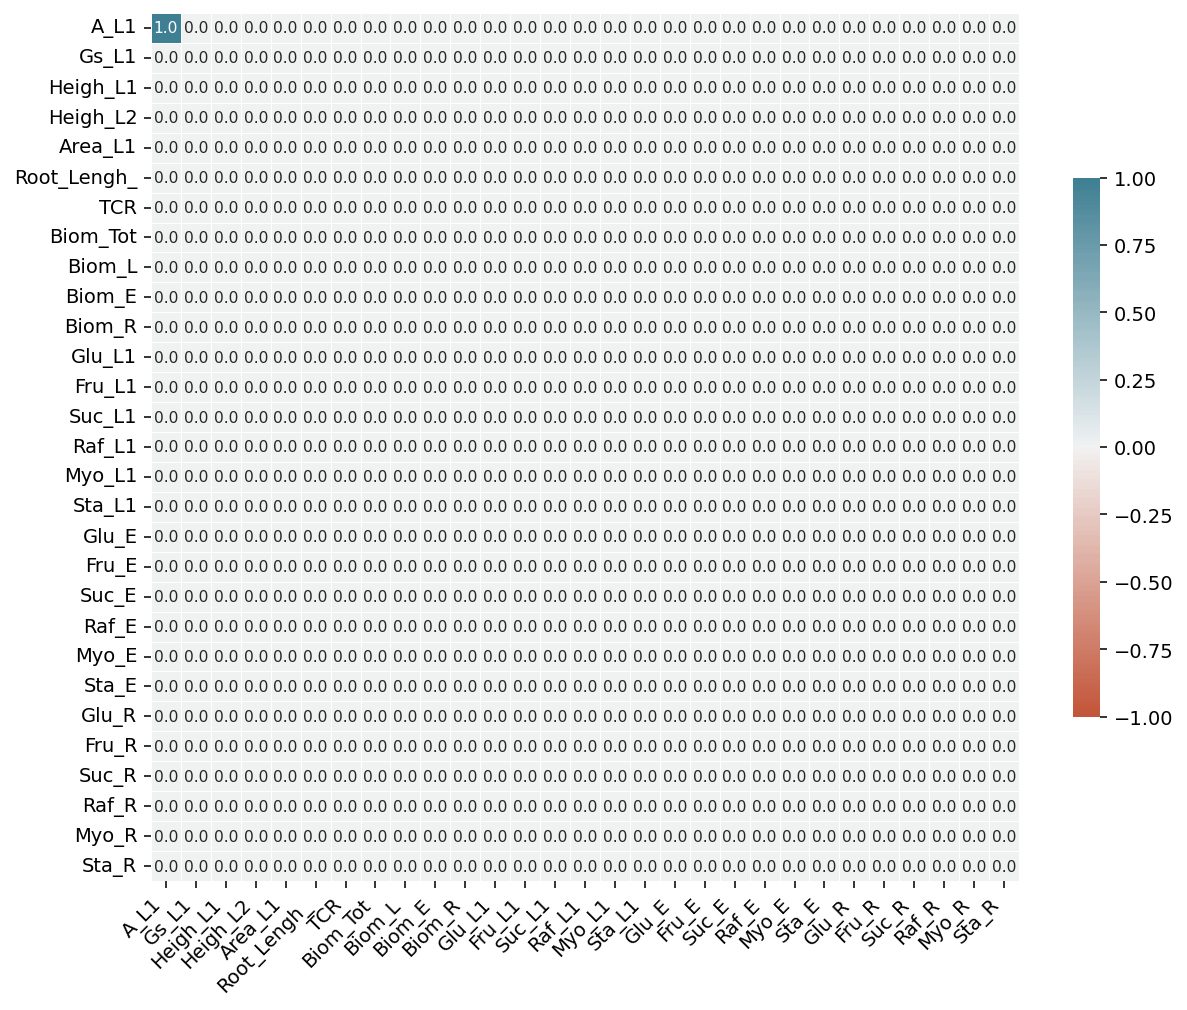

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configure a figura
plt.figure(figsize=(10, 10))

# Crie o heatmap
sns.heatmap(
    corr,
    annot=True,  # adicionar números no heatmap
    fmt=".1f",   # 1 casa decimal
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},  # otimização dos parâmetros de ajuste do tamanho da barra de cor
    annot_kws={"size": 8}  # diminuir o tamanho da fonte das anotações
)

# Rotação do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

# Mostrar a figura
plt.show()

Proxima etapa: retirar as variaveis que possuem correlacao abaixo de 0.7

In [ ]:
# Inicializar DataFrames para correlações e valores p
corr = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
p_values = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)

# Calcular correlações de Pearson e valores p
for col1 in df.columns:
    for col2 in df.columns:
        if col1 == col2:
            corr.at[col1, col2] = 1.0
            p_values.at[col1, col2] = 0.0
        else:
            corr_val, p_val = pearsonr(df[col1], df[col2])
            corr.at[col1, col2] = corr_val
            p_values.at[col1, col2] = p_val

# Plotar o heatmap da correlação com anotações de valores p
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr,
    annot=True,  # adicionar números no heatmap
    fmt=".2f",   # 2 casas decimais
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},  # otimização dos parâmetros de ajuste do tamanho da barra de cor
    annot_kws={"size": 8}  # diminuir o tamanho da fonte das anotações
)

# Rotação do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

plt.title('Heatmap de Correlações de Pearson')

# Mostrar a figura
plt.show()

# Plotar o heatmap dos valores p com anotações
plt.figure(figsize=(10, 10))
sns.heatmap(
    p_values,
    annot=True,  # adicionar números no heatmap
    fmt=".2g",   # formato científico
    vmin=0, vmax=1, center=0.05,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},  # otimização dos parâmetros de ajuste do tamanho da barra de cor
    annot_kws={"size": 8}  # diminuir o tamanho da fonte das anotações
)

# Rotação do eixo x para melhor visualização
plt.xticks(rotation=45, ha='right')

plt.title('Heatmap de Valores p das Correlações de Pearson')

# Mostrar a figura
plt.show()

NameError: name 'pearsonr' is not defined